# Health Burden

## Set up

In [1]:
# Read in data
import pandas
data = pandas.read_csv('C:/Users/Administrator/Desktop/data/prepped/risk-data.csv')

#import the module so that we can tables when printing dataframes
from IPython.display import display, HTML

## Data Structure
To get a basic sense of your dataset, check the following:

- How large is the dataset (rows, columns)?
- What are the variables present in the dataset?
- What is the data type of each variable?

In [2]:
pandas.DataFrame(data)
data=data.fillna(0) # convert all the N/A values to zeros
print 'The size of the data is:'
print pandas.DataFrame.size
print
print 'The List of varaibles are:' , list(data)
print
print 'The data types are:'
print data.dtypes

# creates a table with a total sum
data['sum'] = data.sum(axis=1)-data['pop'] 

The size of the data is:

The List of varaibles are: ['country', 'country.code', 'super.region', 'region', 'sex', 'age', 'pop', 'alcohol.use', 'drug.use', 'high.meat', 'low.exercise', 'smoking']

The data types are:
country          object
country.code     object
super.region     object
region           object
sex              object
age              object
pop             float64
alcohol.use     float64
drug.use        float64
high.meat       float64
low.exercise    float64
smoking         float64
dtype: object



## Univariate Analysis
For each variable of interest, answer the following questions. As you do so, begin making a list of further questions you would like to investigate:

- What does the distribution of each (risk factor) variable look like?
- Is any variable ever missing (and if so, why)?
- What are the basic summary statistics (mean, median, standard deviation) each variable, and what is it's range (min/max)?
- What do you find surprising?

There are many varaibles that are missing, i.e. smoking data is not collected for children age 5 and under.

## Univariate analysis (by age)
In this section, you should investigate how each (risk-variable) varies by **age group**. More specifically, consider if the distribution of each variable of interest (smoking, alcohol use, etc.) is consistent across age-groups.

d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
d:\Anaconda2\lib

,Alcohol Death Rate (%),Death Rate (%),Drug Use Death Rate (%),High Meat Death Rate (%),Low Excercise Death Rate (%),Smoking Death Rate (%)
70+ years,0.112131,12.609886,0.112131,0.065043,3.307551,0.987675
50-69 years,0.014629,0.747869,0.014629,0.005936,0.150171,0.110506
Under 5,0.000107,0.000537,0.000107,0.000000,0.000000,0.000429
5-14 years,0.000028,0.000720,0.000028,0.000000,0.000000,0.000692
15-49 years,0.002288,0.026991,0.002288,0.000137,0.002886,0.010353


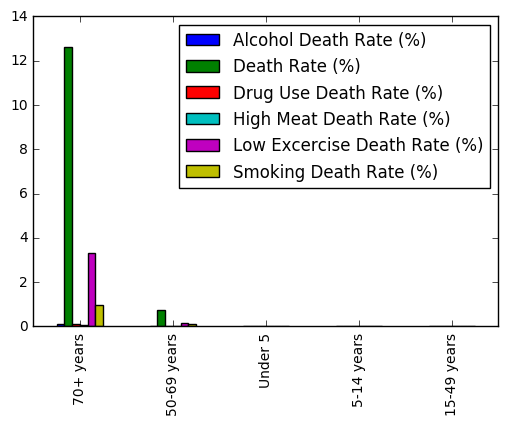

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

ageList = data.age.unique()
rateList = []
smokingList = []
alcoholList = []
drugList   = [] 
highMeatList   = []
lowExerciseList  = []

for i in ageList:
    df=data # reset the dataframe
    df = df.loc[data['age'] == i ]
    df['totalRate']=df['sum'] / df['pop']*100
    df['smokingRate']=df['alcohol.use']/ df['pop']*100
    df['alcoholList']=df['drug.use']/ df['pop']*100
    df['drugList']=df['drug.use']/ df['pop']*100
    df['highMeatList']=df['high.meat']/ df['pop']*100
    df['lowExerciseList']=df['low.exercise']/ df['pop']*100

    rateList.append(df['totalRate'].mean())
    smokingList.append(df['smokingRate'].mean())
    alcoholList.append(df['alcoholList'].mean())
    drugList.append(df['drugList'].mean())
    highMeatList.append(df['highMeatList'].mean())
    lowExerciseList.append(df['lowExerciseList'].mean())
    
dfNew = pandas.DataFrame({"Death Rate (%)" : rateList, \
                          "Smoking Death Rate (%)" : smokingList,\
                         "Alcohol Death Rate (%)" : alcoholList,\
                         "Drug Use Death Rate (%)" : drugList,\
                          "High Meat Death Rate (%)" : highMeatList,\
                         "Low Excercise Death Rate (%)":lowExerciseList},index=ageList)

dfNew.plot(kind='bar')

display(dfNew)

## Univariate analysis (by sex)
In this section, you should investigate how each (risk-variable) varies by **sex group**. More specifically, consider if the distribution of each variable of interest (smoking, alcohol use, etc.) is consistent across sex-groups. Depending on your procedure, you may need to **reshape your data**.

d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
d:\Anaconda2\lib

,Alcohol Death Rate (%),Death Rate (%),Drug Use Death Rate (%),High Meat Death Rate (%),Low Excercise Death Rate (%),Smoking Death Rate (%)
male,0.042193,3.835206,0.042193,0.018157,0.838790,0.333674
female,0.009481,1.519195,0.009481,0.010290,0.545454,0.110188


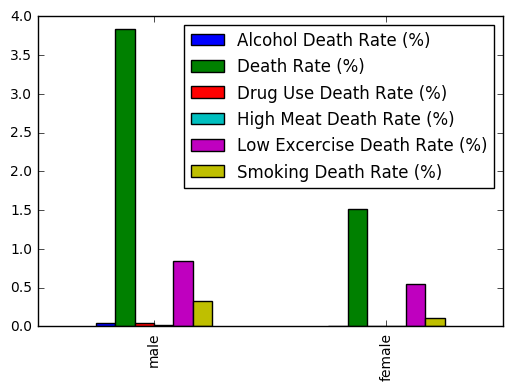

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

sexList = data.sex.unique()
rateList = []
smokingList = []
alcoholList = []
drugList   = [] 
highMeatList   = []
lowExerciseList  = []

for i in sexList:
    df=data # reset the dataframe
    df = df.loc[data['sex'] == i ]
    df['totalRate']=df['sum'] / df['pop']*100
    df['smokingRate']=df['alcohol.use']/ df['pop']*100
    df['alcoholList']=df['drug.use']/ df['pop']*100
    df['drugList']=df['drug.use']/ df['pop']*100
    df['highMeatList']=df['high.meat']/ df['pop']*100
    df['lowExerciseList']=df['low.exercise']/ df['pop']*100
    
    rateList.append(df['totalRate'].mean())
    smokingList.append(df['smokingRate'].mean())
    alcoholList.append(df['alcoholList'].mean())
    drugList.append(df['drugList'].mean())
    highMeatList.append(df['highMeatList'].mean())
    lowExerciseList.append(df['lowExerciseList'].mean())
    
dfNew = pandas.DataFrame({"Death Rate (%)" : rateList, \
                          "Smoking Death Rate (%)" : smokingList,\
                         "Alcohol Death Rate (%)" : alcoholList,\
                         "Drug Use Death Rate (%)" : drugList,\
                          "High Meat Death Rate (%)" : highMeatList,\
                         "Low Excercise Death Rate (%)":lowExerciseList},index=sexList)

dfNew.plot(kind='bar')
display(dfNew)

## Univariate analysis (by country)
In this section, you should investigate how each (risk-variable) varies by **country**. Given the number of countries present in the dataset, I suggest that you aggregate your data by region. In order to do this, you'll need to **convert death rates to deaths** using the `pop` column.

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

countryList = data.country.unique()
rateList = []

for i in countryList:
    df=data # reset the dataframe
    df = df.loc[data['country'] == i ]
    df['totalRate']=df['sum'] / df['pop']*100
    
    rateList.append(df['totalRate'].mean())
   
dfNew = pandas.DataFrame({"Death Rate (%)" : rateList},index=countryList)

display(dfNew)

d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Death Rate (%)
China,0.000914
North Korea,0.079032
Taiwan,0.031172
Cambodia,0.263120
Indonesia,0.006659
Laos,0.535087
Malaysia,0.055138
Maldives,2.101929
Mauritius,0.771540
Myanmar,0.053655


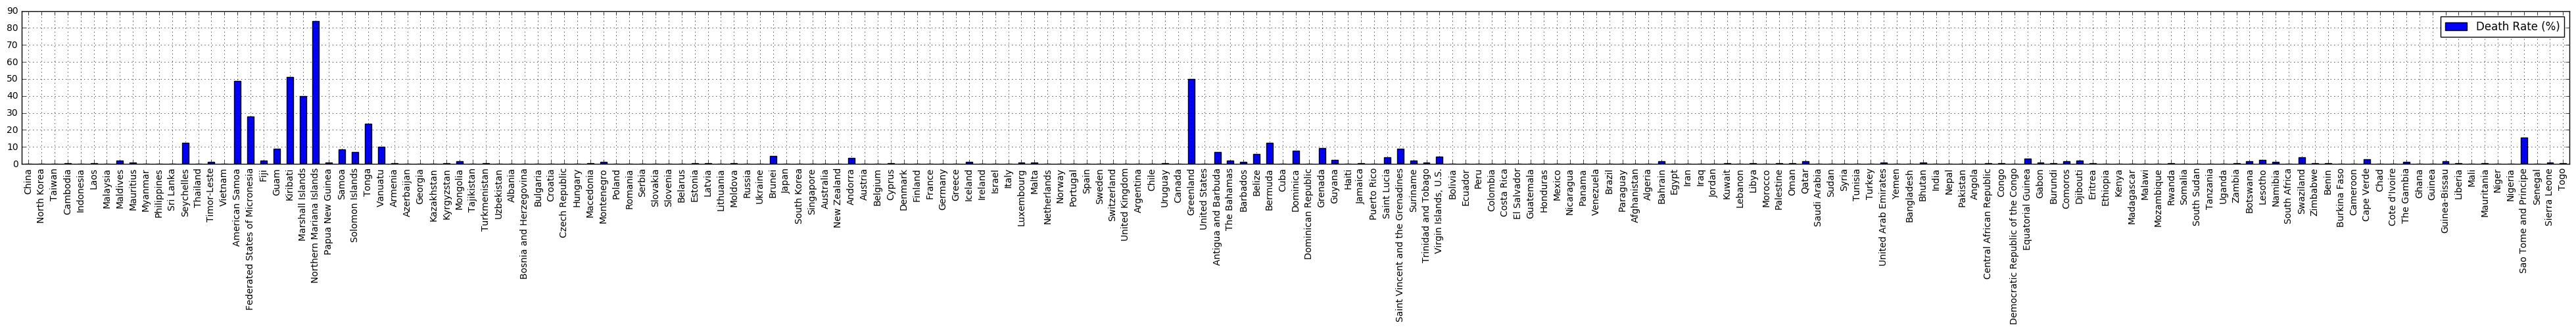

In [23]:
dfNew.plot(kind='bar',figsize=(50,3),grid=True)

## Bivariate analysis
In this section, you should compare risks-variables to one another to see how they co-vary. Use simple statistical tests (i.e., **correlation**) and visualization as you see fit. 

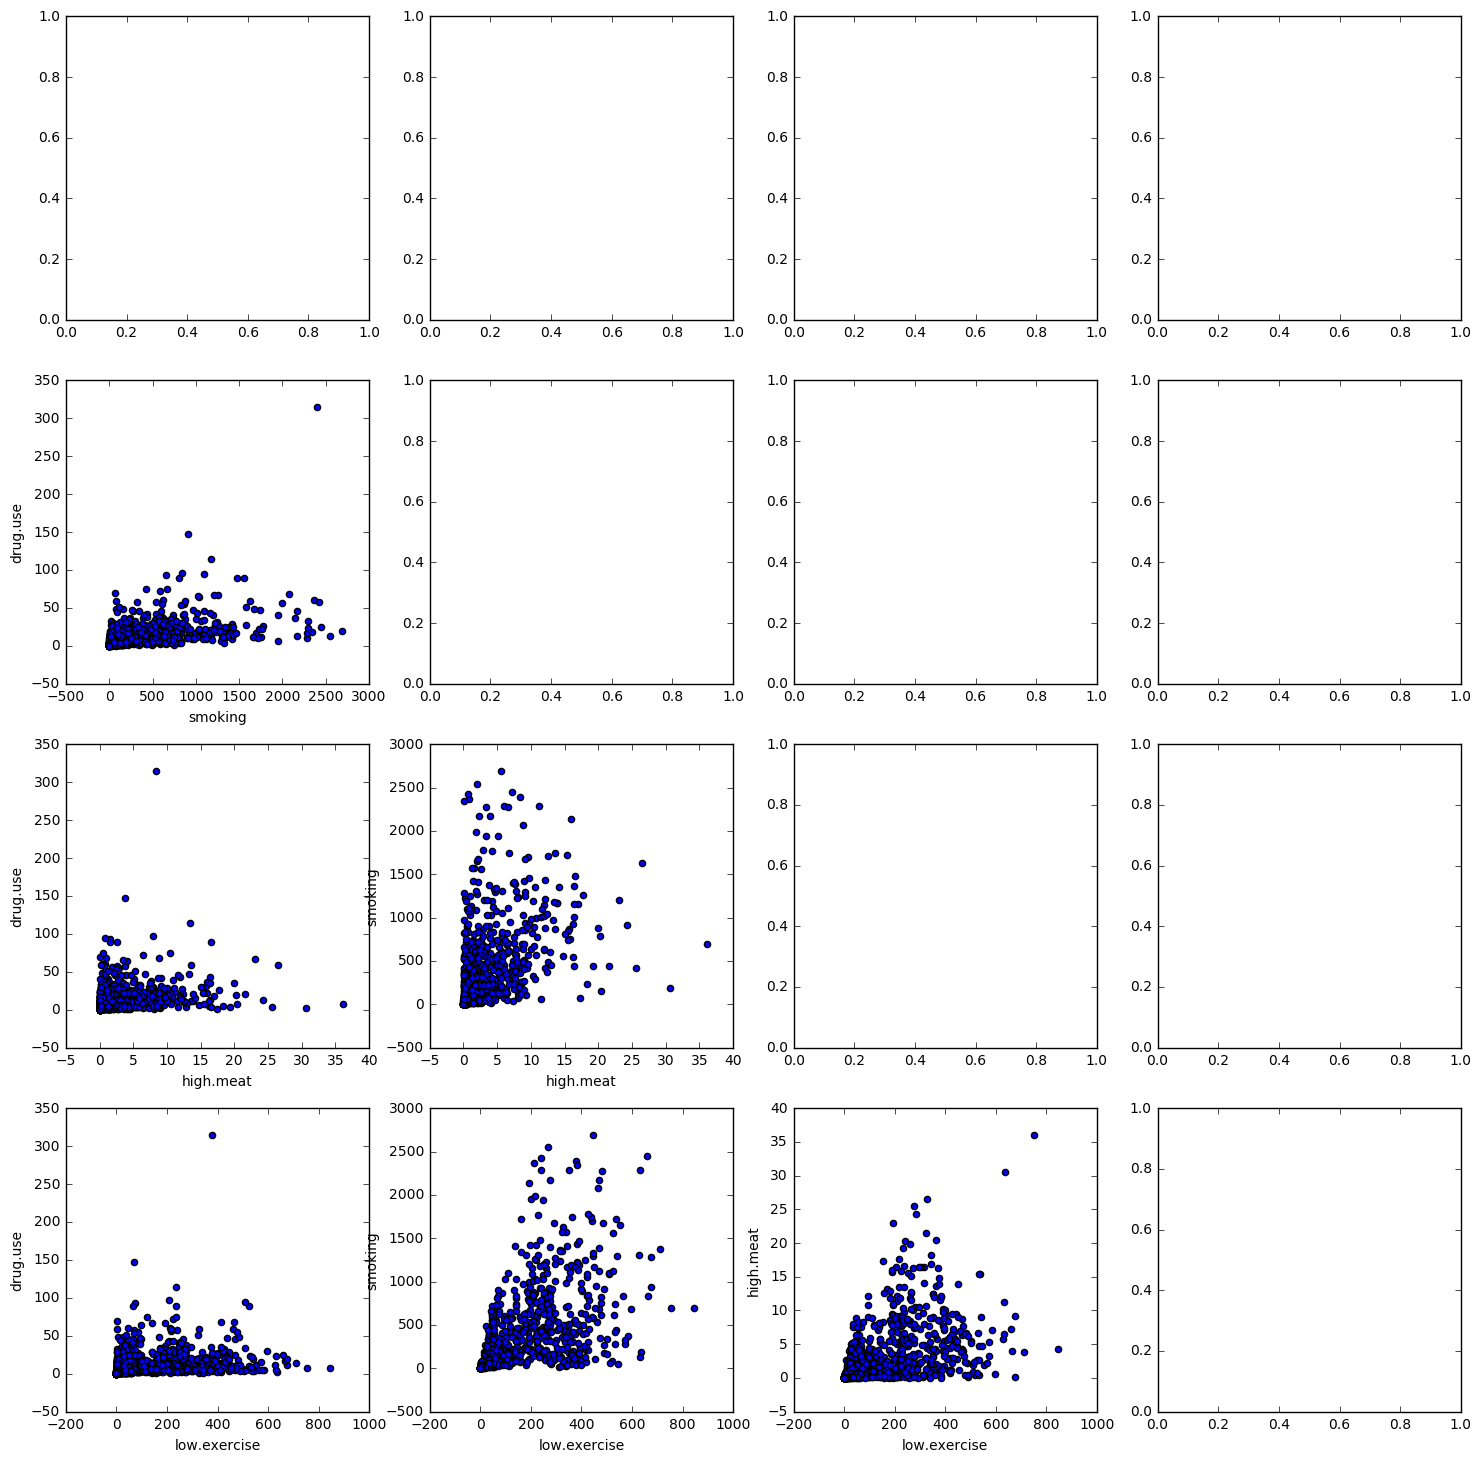

In [67]:
fig, axes = plt.subplots(nrows=4, ncols=4)
data.plot.scatter(x='smoking',y='drug.use',ax=axes[1, 0],figsize=(18,18))
data.plot.scatter(y='smoking',x='high.meat',ax=axes[2, 1])
data.plot.scatter(x='high.meat',y='drug.use',ax=axes[2, 0])
data.plot.scatter(y='smoking',x='low.exercise',ax=axes[3, 1])
data.plot.scatter(x='low.exercise',y='drug.use',ax=axes[3, 0])
data.plot.scatter(x='low.exercise',y='high.meat',ax=axes[3, 2])